<center>

<h1 style="color:#4CAF50; font-size:42px;">DV ScreenSense Project</h1>  

<hr style="border:1px solid #ccc; width:70%;">  

<p style="font-size:18px; color:#555;">
✨ Data Visualization | Screen Time Analysis | Smart Insights ✨  
</p>  

</center>


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Data Import and Exploration

In [52]:
df=pd.read_csv("Indian_Kids_Screen_Time.csv")
print("Shape: ", df.shape)
print()
df.head()

Shape:  (9712, 8)



,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [53]:
df.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [55]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [56]:
df_1=df[["Primary_Device","Health_Impacts"]]
df_1

,Primary_Device,Health_Impacts
0,Smartphone,"Poor Sleep, Eye Strain"
1,Laptop,Poor Sleep
2,TV,Poor Sleep
3,Laptop,NaN
4,Smartphone,"Poor Sleep, Anxiety"
...,...,...
9707,Smartphone,Poor Sleep
9708,Smartphone,Poor Sleep
9709,Smartphone,"Poor Sleep, Eye Strain, Anxiety"
9710,TV,Poor Sleep


In [57]:
df_2=df[["Primary_Device", "Health_Impacts"]][2:10:2]
df_2

,Primary_Device,Health_Impacts
2,TV,Poor Sleep
4,Smartphone,"Poor Sleep, Anxiety"
6,TV,NaN
8,Laptop,"Poor Sleep, Anxiety"


# Data Exploration and Visualization

In [58]:
df['Gender'] = df['Gender'].astype('category')
df['Urban_or_Rural'] = df['Urban_or_Rural'].astype('category')
df['Primary_Device'] = df['Primary_Device'].astype('category')


In [59]:
df.duplicated().value_counts()

False    9668
True       44
Name: count, dtype: int64

We Found 44 Duplicate rows

In [60]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Here, We Can See that Health_Impacts has 3218 NaN Values 

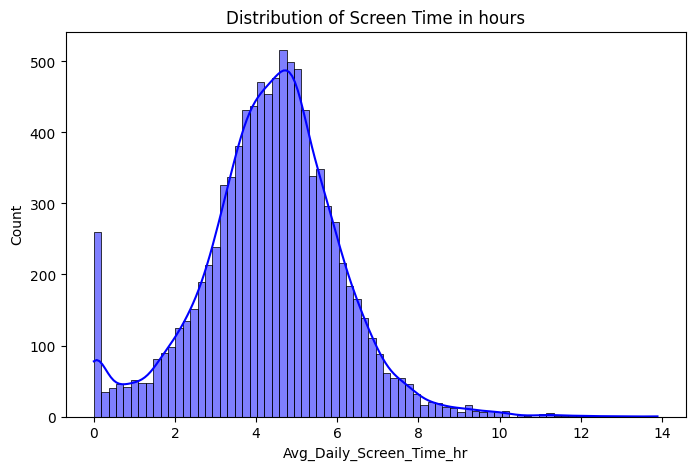

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df["Avg_Daily_Screen_Time_hr"],kde=True, color="Blue")
plt.title("Distribution of Screen Time in hours")
plt.show()

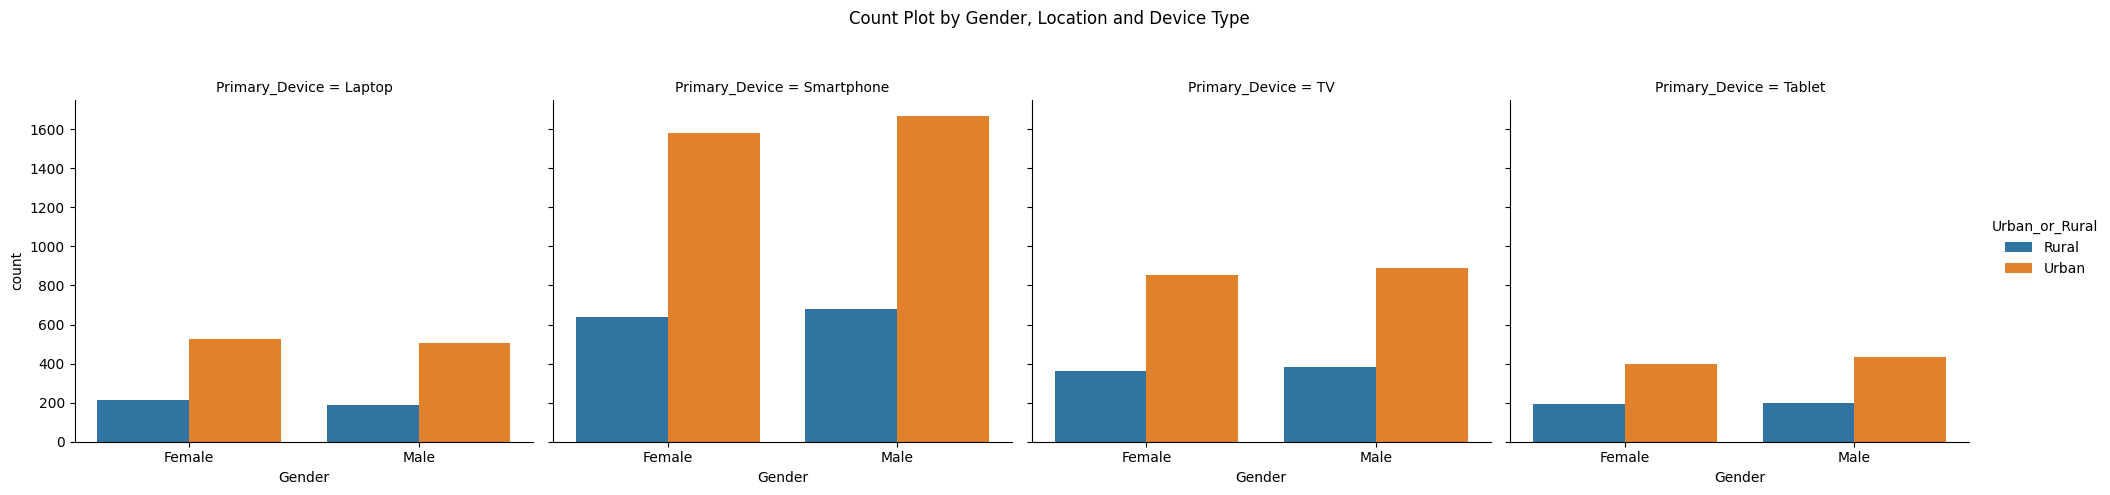

In [62]:

sns.catplot(
data=df,
x="Gender",
hue="Urban_or_Rural",
col="Primary_Device",
kind="count",
height=5,
aspect=1
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Count Plot by Gender, Location and Device Type")
plt.show()

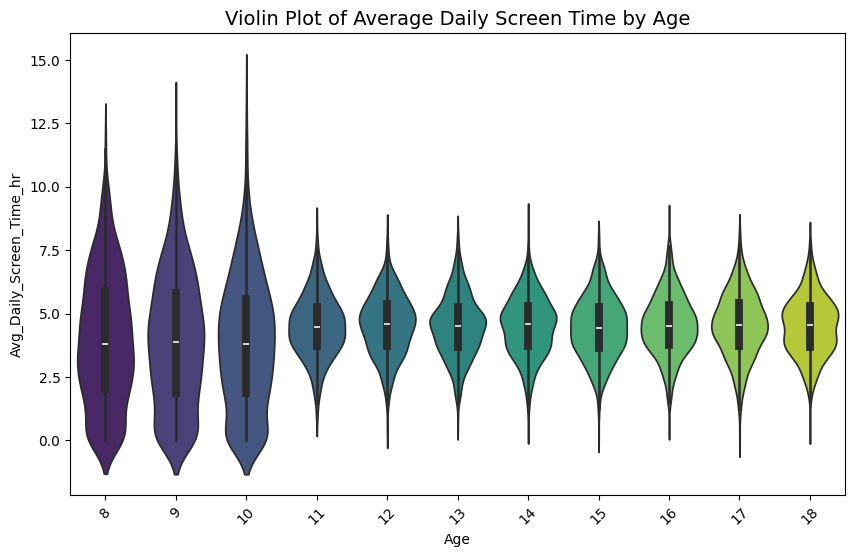

In [63]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df,
    x="Age",
    y="Avg_Daily_Screen_Time_hr",
    palette="viridis"
)
plt.title("Violin Plot of Average Daily Screen Time by Age", fontsize=14)
plt.xticks(rotation=45)
plt.show()


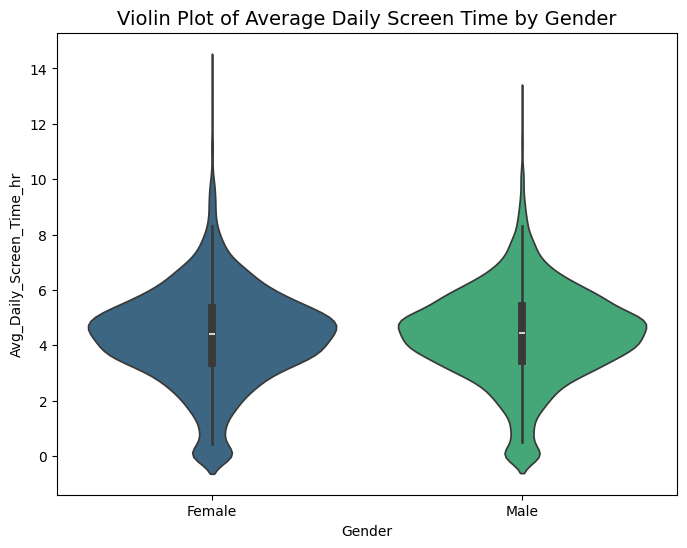

In [64]:
# Violin Plot: Average Daily Screen Time by Gender
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    palette="viridis"
)
plt.title("Violin Plot of Average Daily Screen Time by Gender", fontsize=14)
plt.show()


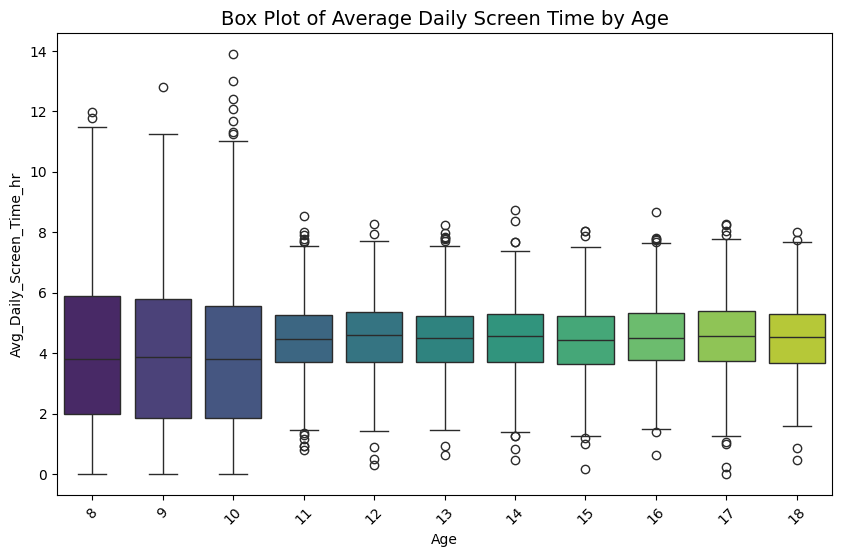

In [65]:
# Box Plot: Average Daily Screen Time by Age
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Age",
    y="Avg_Daily_Screen_Time_hr",
    palette="viridis"
)
plt.title("Box Plot of Average Daily Screen Time by Age", fontsize=14)
plt.xticks(rotation=45)
plt.show()


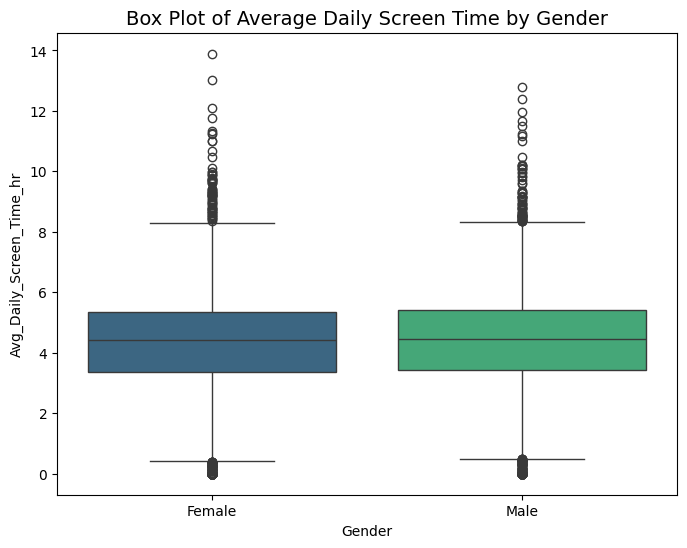

In [66]:
# Box Plot: Average Daily Screen Time by Gender
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Screen_Time_hr",
    palette="viridis"
)
plt.title("Box Plot of Average Daily Screen Time by Gender", fontsize=14)
plt.show()


In [67]:
#Histograms & KDE plots for continuous variables (screen time, age).

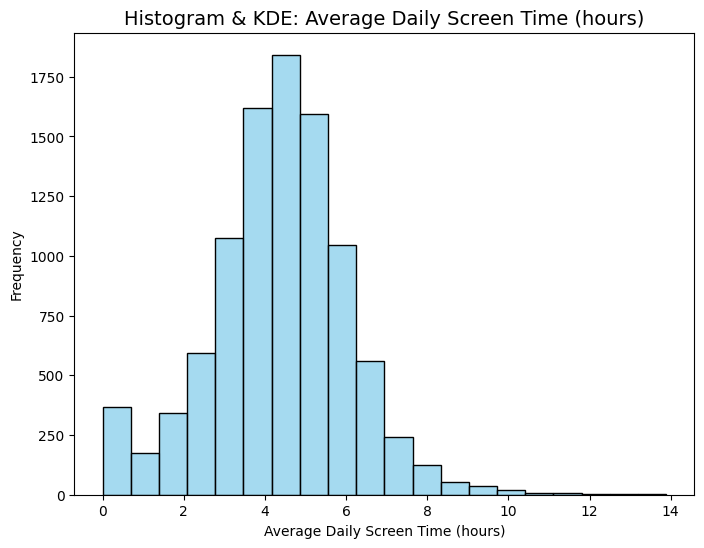

In [68]:
# Histogram & KDE for Average Daily Screen Time
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="Avg_Daily_Screen_Time_hr",
    bins=20,
    color="skyblue"
)
plt.title("Histogram & KDE: Average Daily Screen Time (hours)", fontsize=14)
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")
plt.show()


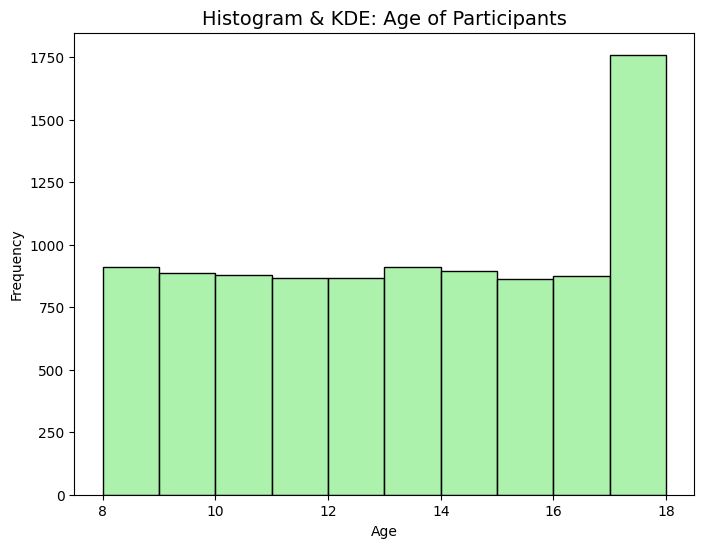

In [69]:
# Histogram & KDE for Age
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="Age",
    bins=10,
    color="lightgreen"
)
plt.title("Histogram & KDE: Age of Participants", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


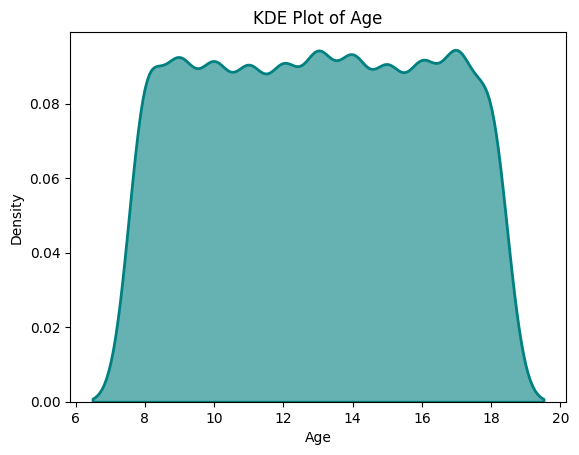

In [70]:
# KDE Plot for Age
sns.kdeplot(
    data=df,
    x="Age",
    fill=True,
    color="teal",
    alpha=0.6,
    linewidth=2
)
plt.title("KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


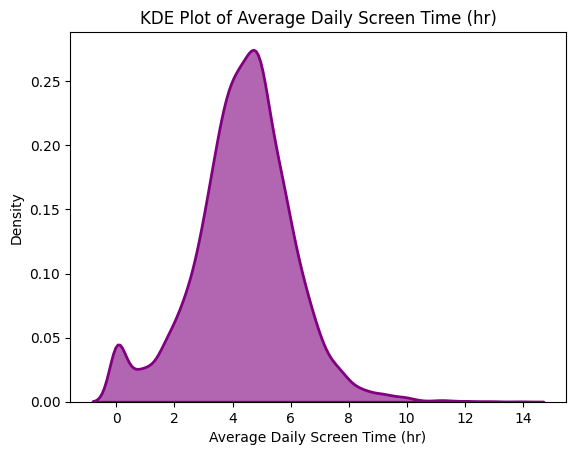

In [71]:
# KDE Plot for Average Daily Screen Time
sns.kdeplot(
    data=df,
    x="Avg_Daily_Screen_Time_hr",
    fill=True,
    color="purple",
    alpha=0.6,
    linewidth=2
)
plt.title("KDE Plot of Average Daily Screen Time (hr)")
plt.xlabel("Average Daily Screen Time (hr)")
plt.ylabel("Density")
plt.show()

In [72]:
dummy_dates = pd.to_datetime(pd.date_range(start='2024-01-01', periods=len(df), freq='D'))
df['Date'] = dummy_dates

df['Day_Type'] = np.where(df['Date'].dt.dayofweek >= 5, 'Weekend', 'Weekday')

display(df.head())

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Date,Day_Type
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,2024-01-01,Weekday
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,2024-01-02,Weekday
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,2024-01-03,Weekday
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,2024-01-04,Weekday
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,2024-01-05,Weekday


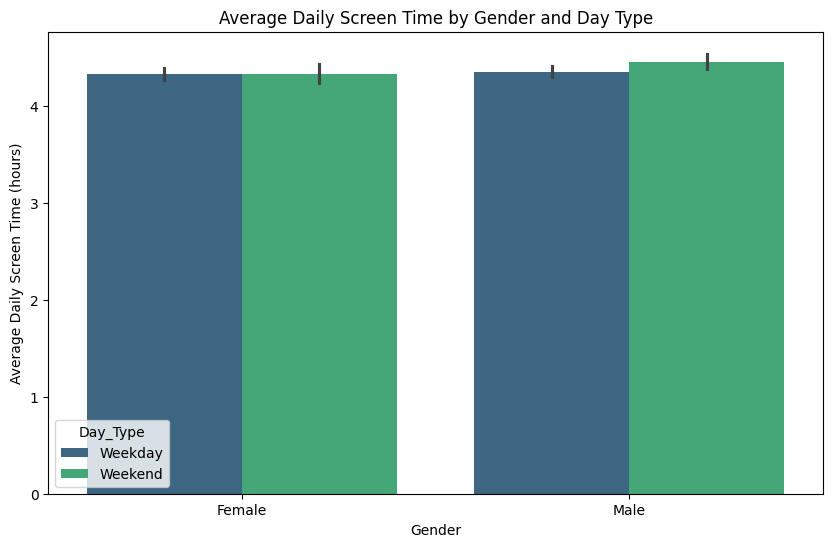

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Day_Type', palette='viridis')
plt.title('Average Daily Screen Time by Gender and Day Type')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hours)')


plt.show()

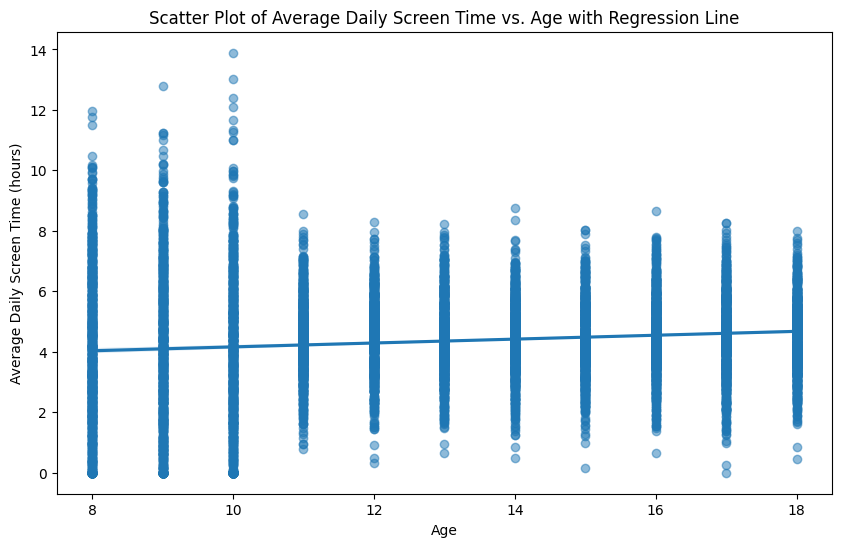

In [74]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Average Daily Screen Time vs. Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

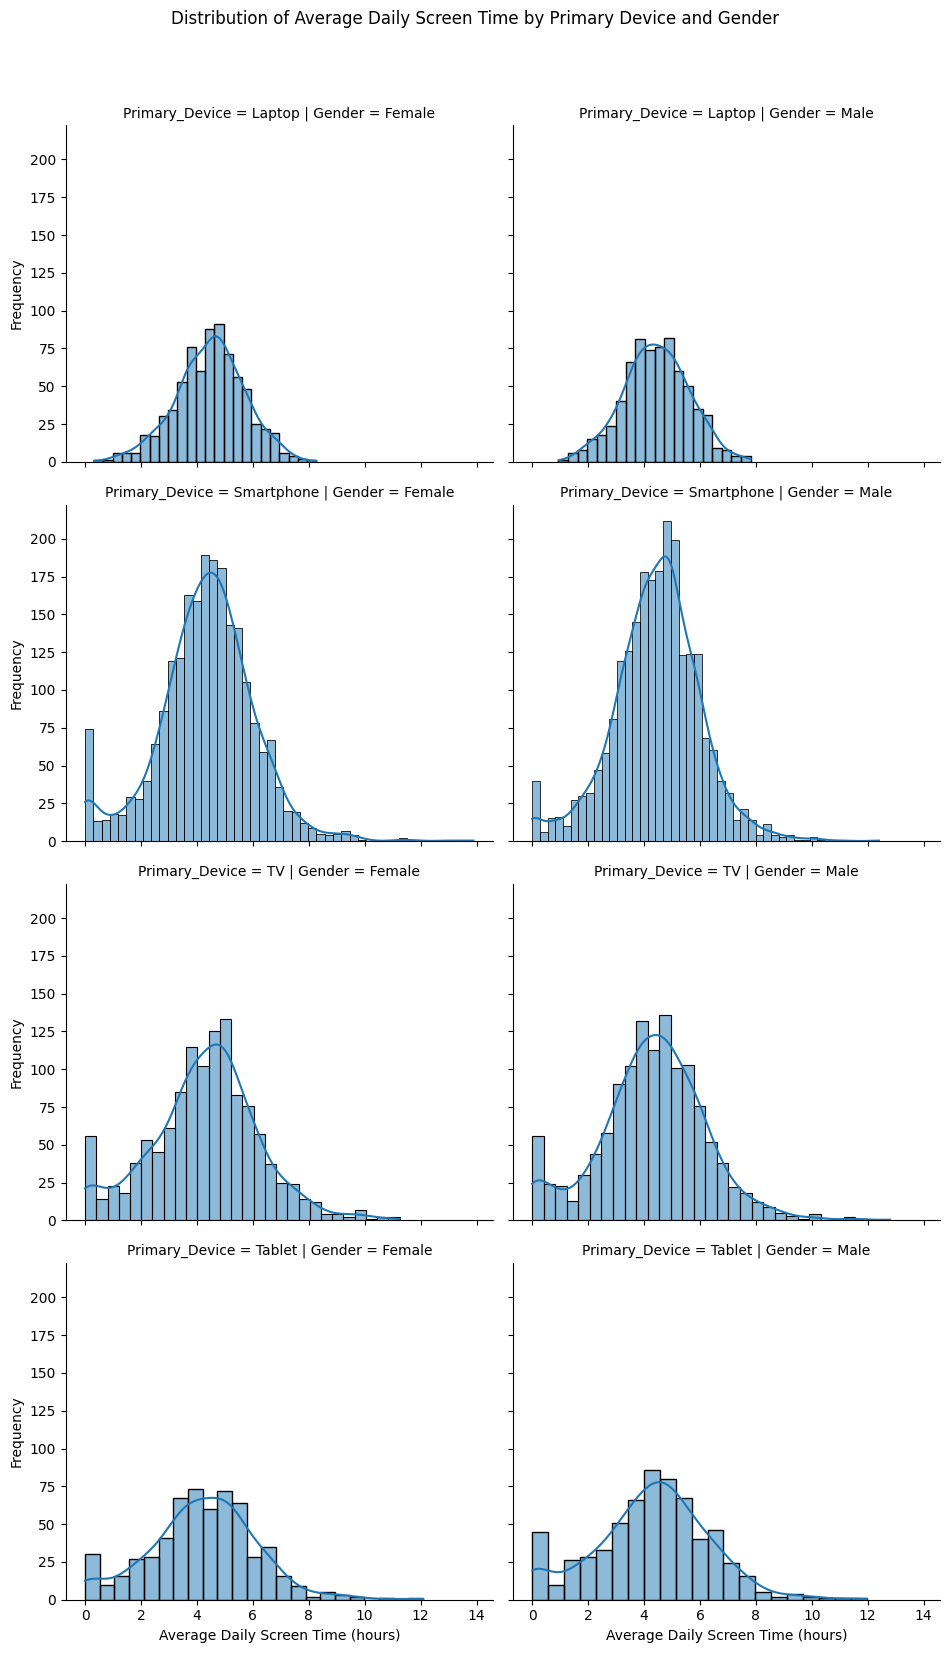

In [75]:
g = sns.FacetGrid(df, col='Gender', row='Primary_Device', height=4, aspect=1.2)
g.map(sns.histplot, 'Avg_Daily_Screen_Time_hr', kde=True)
g.fig.suptitle('Distribution of Average Daily Screen Time by Primary Device and Gender', y=1.03)
g.set_axis_labels('Average Daily Screen Time (hours)', 'Frequency')
plt.tight_layout()
plt.show()

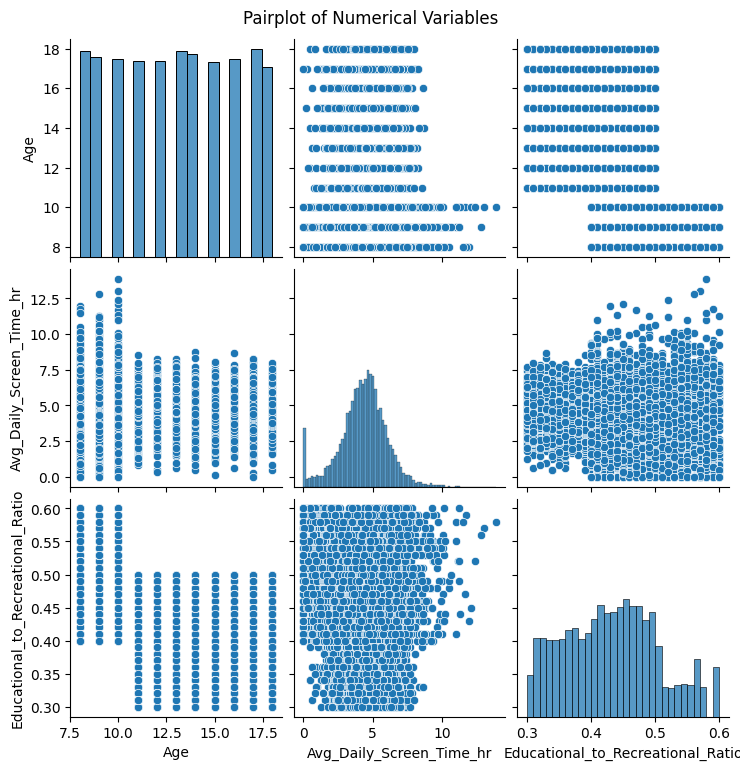

In [76]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

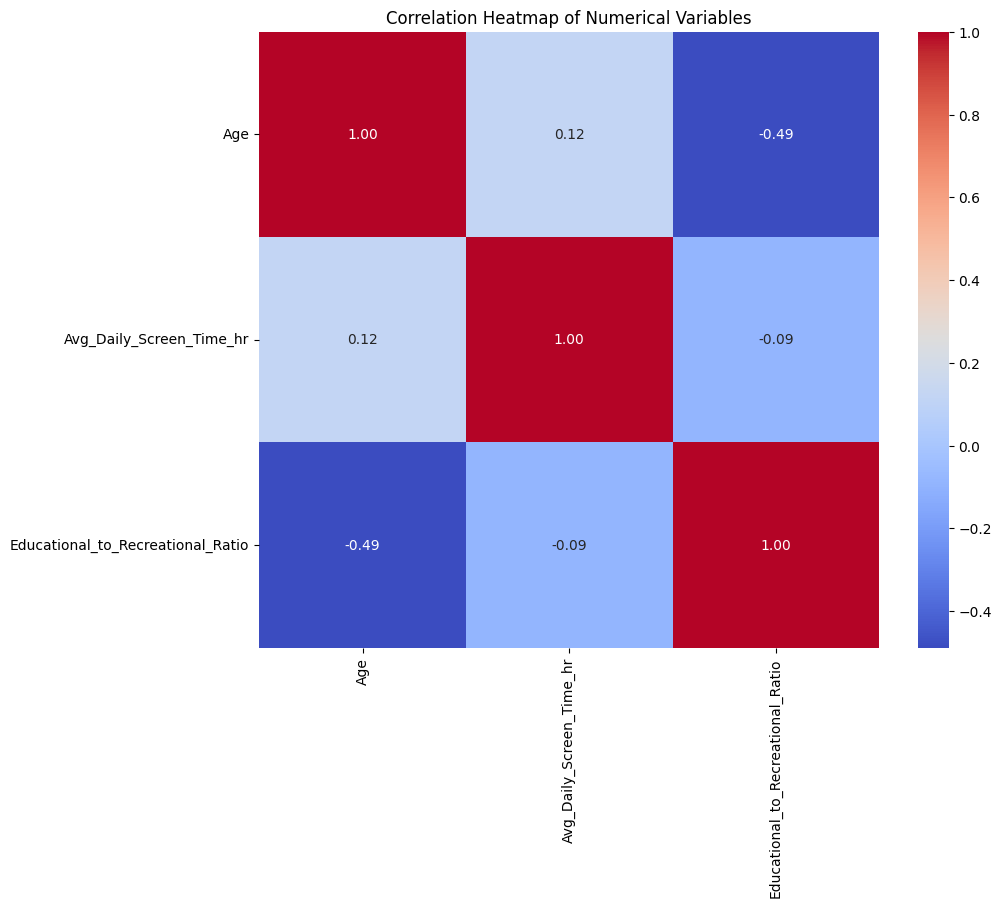

In [77]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

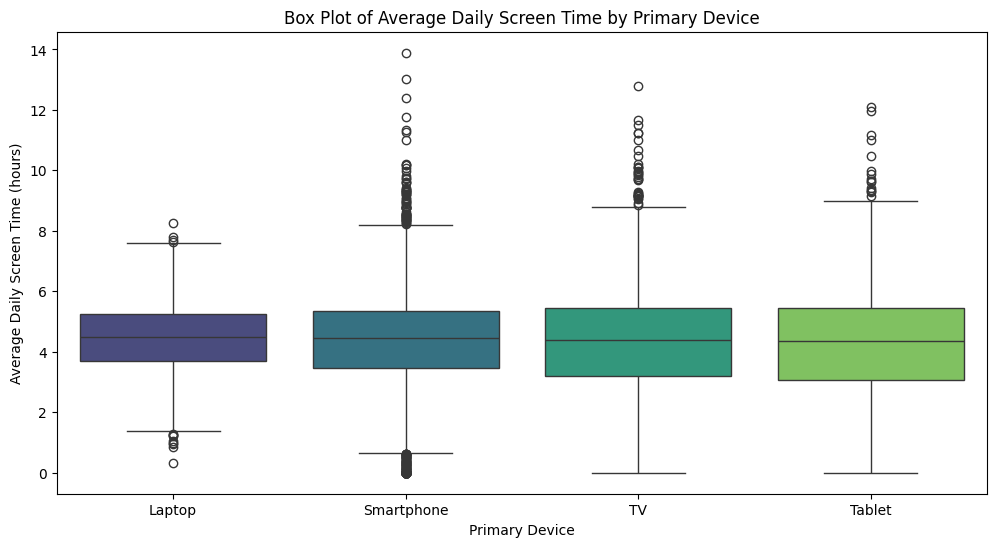

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='viridis', legend=False)
plt.title('Box Plot of Average Daily Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

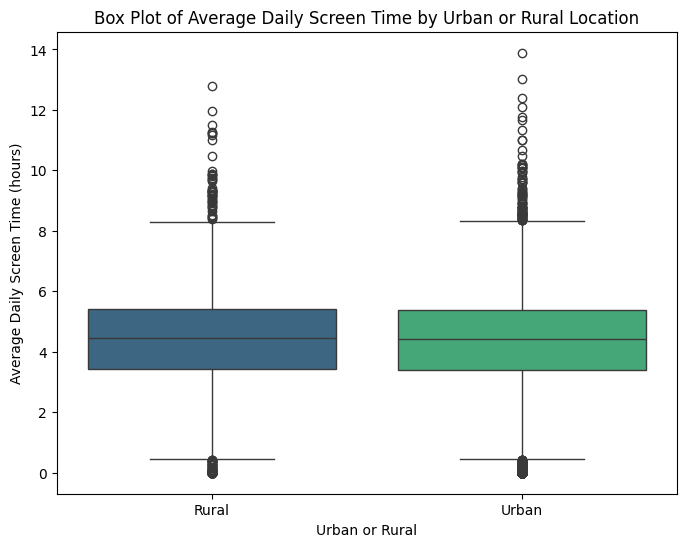

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette='viridis', legend=False)
plt.title('Box Plot of Average Daily Screen Time by Urban or Rural Location')
plt.xlabel('Urban or Rural')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

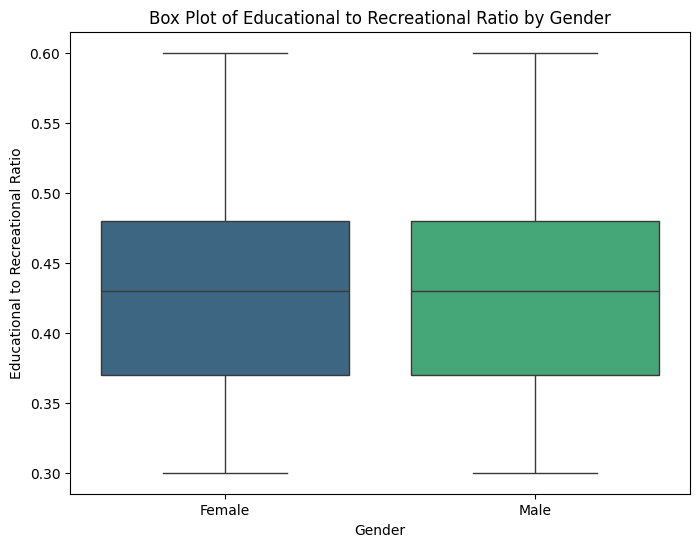

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio', hue='Gender', palette='viridis', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

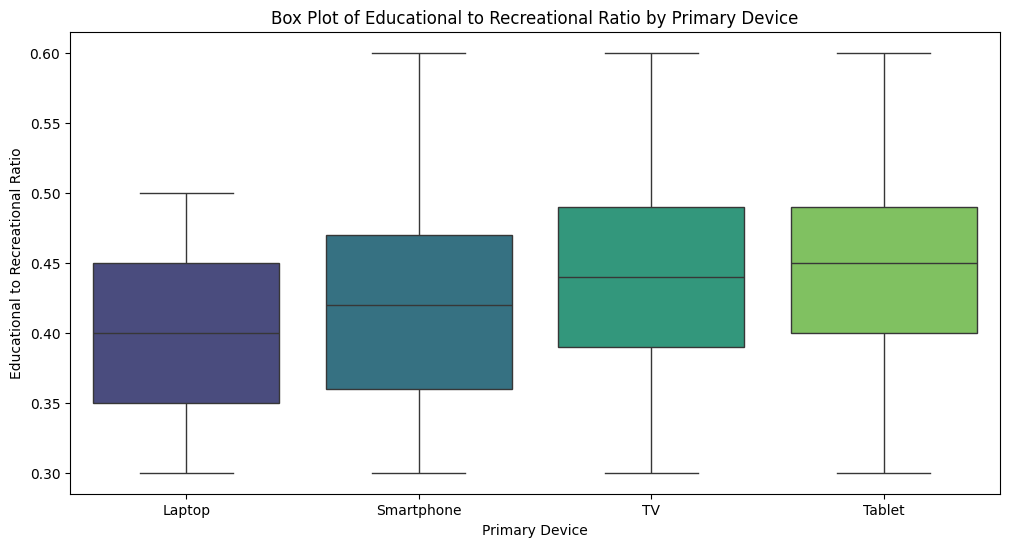

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Primary_Device', y='Educational_to_Recreational_Ratio', hue='Primary_Device', palette='viridis', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

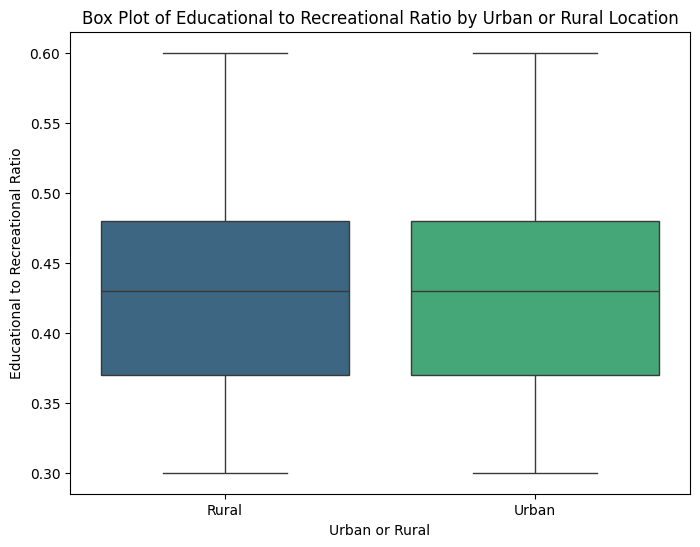

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Educational_to_Recreational_Ratio', hue='Urban_or_Rural', palette='viridis', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Urban or Rural Location')
plt.xlabel('Urban or Rural')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

In [83]:
device_gender_counts = df.groupby('Primary_Device')['Gender'].value_counts().unstack(fill_value=0)
display(device_gender_counts)

Gender,Female,Male
Primary_Device,,
Laptop,741,692
Smartphone,2221,2347
TV,1218,1269
Tablet,590,634


<Figure size 1200x600 with 0 Axes>

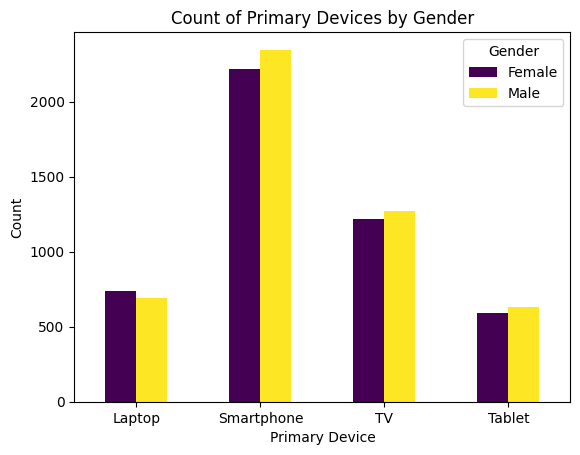

In [84]:
plt.figure(figsize=(12, 6))
device_gender_counts.plot(kind='bar', rot=0, colormap='viridis')
plt.title('Count of Primary Devices by Gender')
plt.xlabel('Primary Device')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

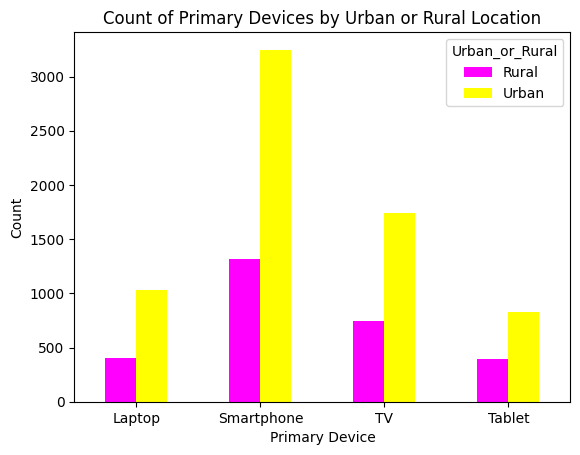

In [85]:
device_location_counts = df.groupby('Primary_Device')['Urban_or_Rural'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
device_location_counts.plot(kind='bar', rot=0, colormap='spring')
plt.title('Count of Primary Devices by Urban or Rural Location')
plt.xlabel('Primary Device')
plt.ylabel('Count')
plt.show()

## Analyzing health impacts column


In [86]:
health_impact_counts = df['Health_Impacts'].value_counts()
print("Unique values and their counts in 'Health_Impacts' column:")
display(health_impact_counts)

Unique values and their counts in 'Health_Impacts' column:


Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

## Investigating relationships with categorical variables


In [87]:
gender_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Gender'])
device_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Primary_Device'])
location_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Urban_or_Rural'])

print("Cross-tabulation of Health_Impacts and Gender:")
display(gender_health_crosstab)

print("\nCross-tabulation of Health_Impacts and Primary_Device:")
display(device_health_crosstab)

print("\nCross-tabulation of Health_Impacts and Urban_or_Rural:")
display(location_health_crosstab)

Cross-tabulation of Health_Impacts and Gender:


Gender,Female,Male
Health_Impacts,,
Anxiety,186,199
"Anxiety, Obesity Risk",35,34
Eye Strain,324,320
"Eye Strain, Anxiety",68,67
"Eye Strain, Anxiety, Obesity Risk",16,19
"Eye Strain, Obesity Risk",53,53
Obesity Risk,103,149
Poor Sleep,1117,1151
"Poor Sleep, Anxiety",294,314



Cross-tabulation of Health_Impacts and Primary_Device:


Primary_Device,Laptop,Smartphone,TV,Tablet
Health_Impacts,,,,
Anxiety,62,180,103,40
"Anxiety, Obesity Risk",11,34,16,8
Eye Strain,101,307,170,66
"Eye Strain, Anxiety",28,63,25,19
"Eye Strain, Anxiety, Obesity Risk",7,19,9,0
"Eye Strain, Obesity Risk",16,57,23,10
Obesity Risk,37,132,57,26
Poor Sleep,370,1051,576,271
"Poor Sleep, Anxiety",108,272,151,77



Cross-tabulation of Health_Impacts and Urban_or_Rural:


Urban_or_Rural,Rural,Urban
Health_Impacts,,
Anxiety,117,268
"Anxiety, Obesity Risk",20,49
Eye Strain,189,455
"Eye Strain, Anxiety",30,105
"Eye Strain, Anxiety, Obesity Risk",14,21
"Eye Strain, Obesity Risk",25,81
Obesity Risk,75,177
Poor Sleep,655,1613
"Poor Sleep, Anxiety",192,416


## Investigating relationships with numerical variables


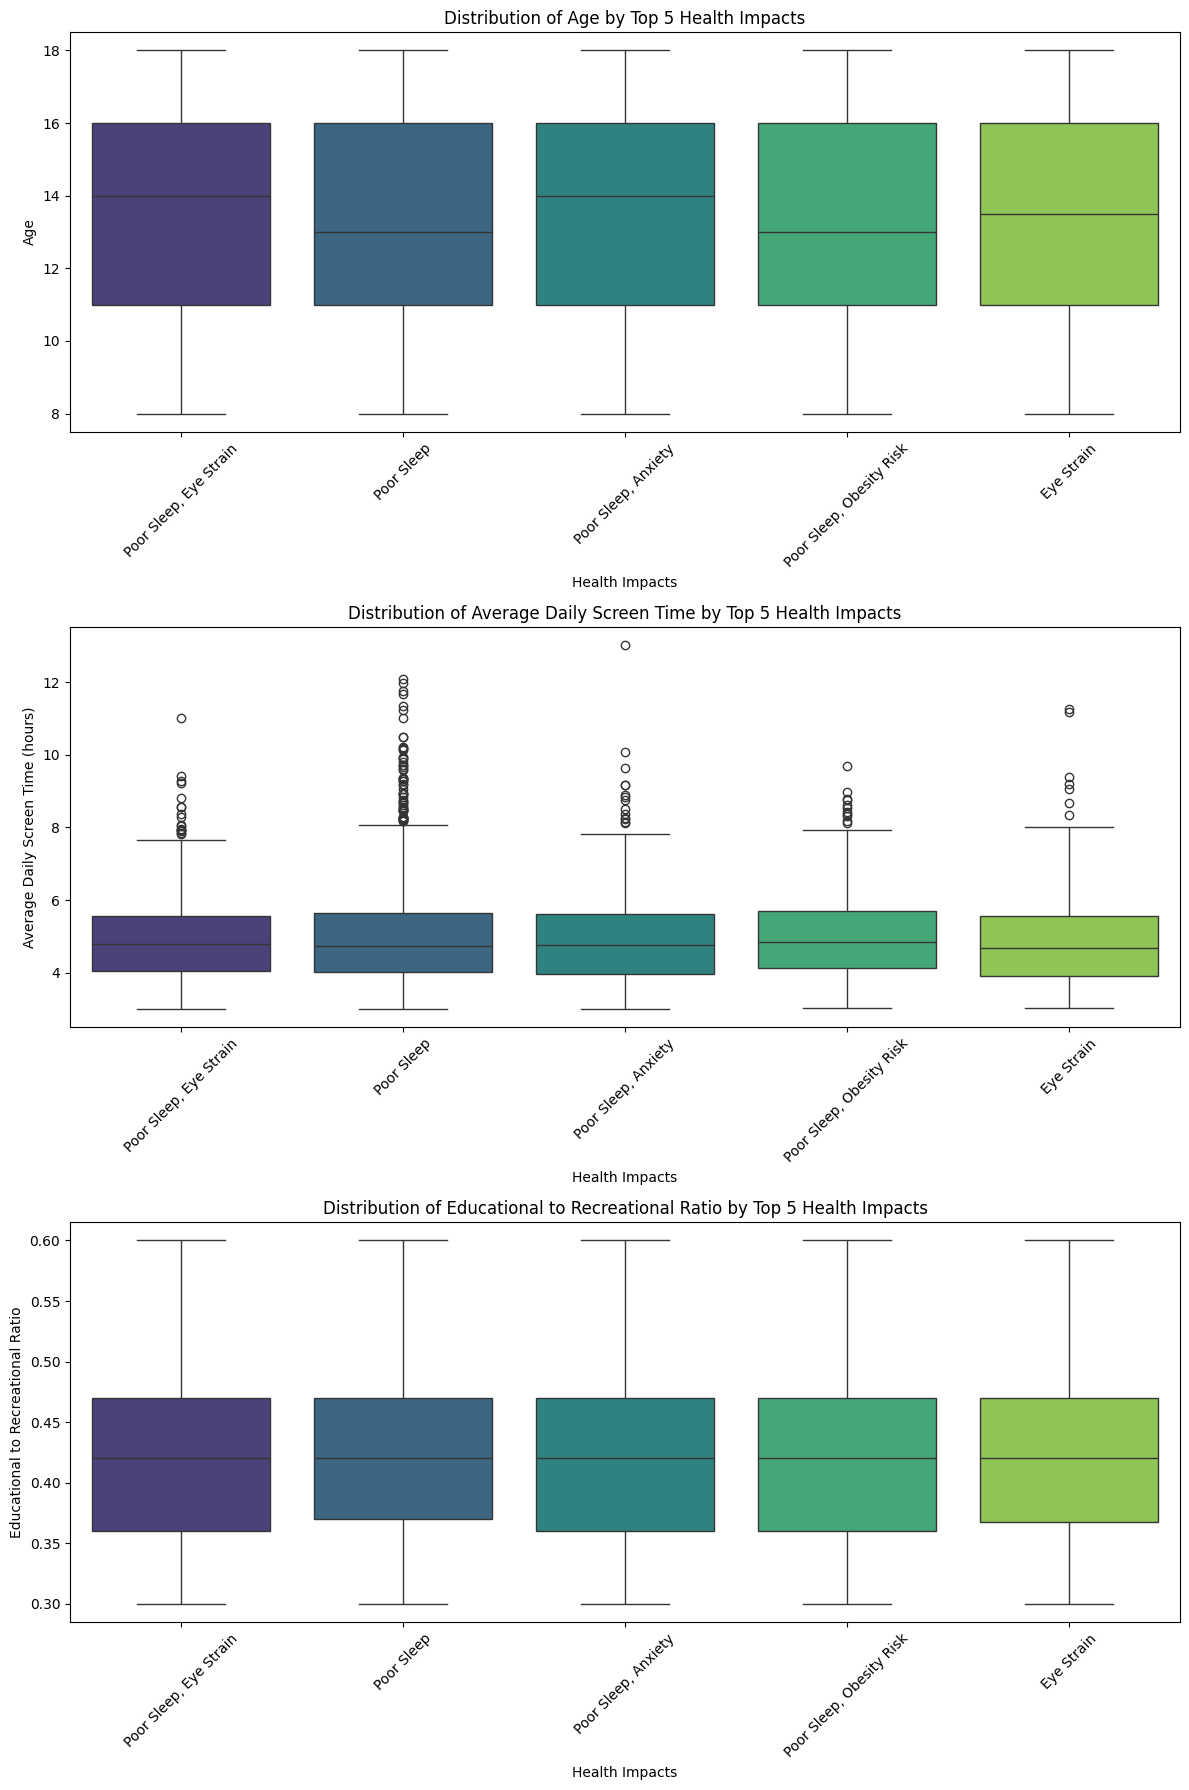

In [88]:
top_health_impacts = df['Health_Impacts'].value_counts().nlargest(5).index.tolist()
df_filtered = df[df['Health_Impacts'].isin(top_health_impacts)]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Age', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Age by Top 5 Health Impacts')
axes[0].set_xlabel('Health Impacts')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Average Daily Screen Time by Top 5 Health Impacts')
axes[1].set_xlabel('Health Impacts')
axes[1].set_ylabel('Average Daily Screen Time (hours)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Educational_to_Recreational_Ratio', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Educational to Recreational Ratio by Top 5 Health Impacts')
axes[2].set_xlabel('Health Impacts')
axes[2].set_ylabel('Educational to Recreational Ratio')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [89]:
from scipy import stats

numerical_vars = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

for var in numerical_vars:
    groups = [df_filtered[df_filtered['Health_Impacts'] == impact][var].dropna() for impact in top_health_impacts]
    if len(groups) > 1:
        f_statistic, p_value = stats.f_oneway(*groups)
        print(f"ANOVA test for {var} across Top 5 Health Impacts:")
        print(f"F-statistic: {f_statistic:.2f}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("Result: There is a statistically significant difference in the means.")
        else:
            print("Result: There is no statistically significant difference in the means.")
        print("-" * 30)
    else:
        print(f"Not enough groups to perform ANOVA for {var}.")


ANOVA test for Age across Top 5 Health Impacts:
F-statistic: 3.40, P-value: 0.0087
Result: There is a statistically significant difference in the means.
------------------------------
ANOVA test for Avg_Daily_Screen_Time_hr across Top 5 Health Impacts:
F-statistic: 2.59, P-value: 0.0351
Result: There is a statistically significant difference in the means.
------------------------------
ANOVA test for Educational_to_Recreational_Ratio across Top 5 Health Impacts:
F-statistic: 0.29, P-value: 0.8860
Result: There is no statistically significant difference in the means.
------------------------------


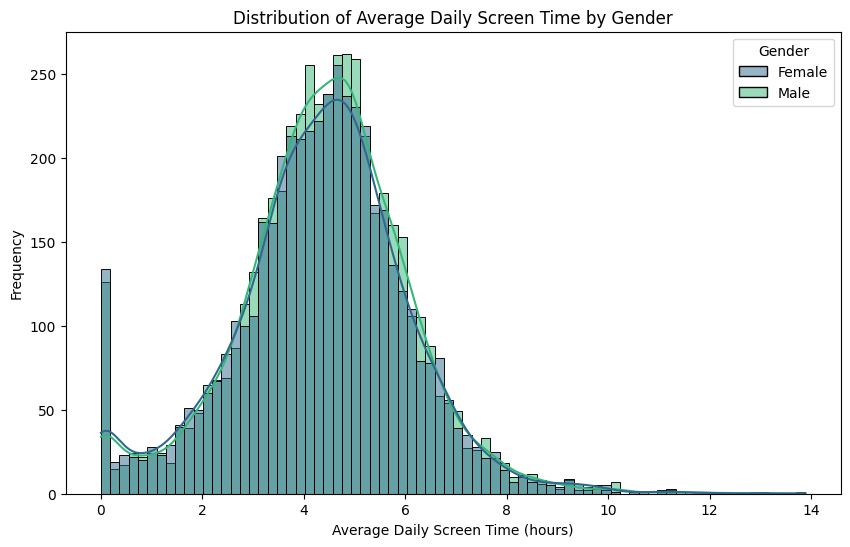

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', kde=True, palette='viridis')
plt.title('Distribution of Average Daily Screen Time by Gender')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

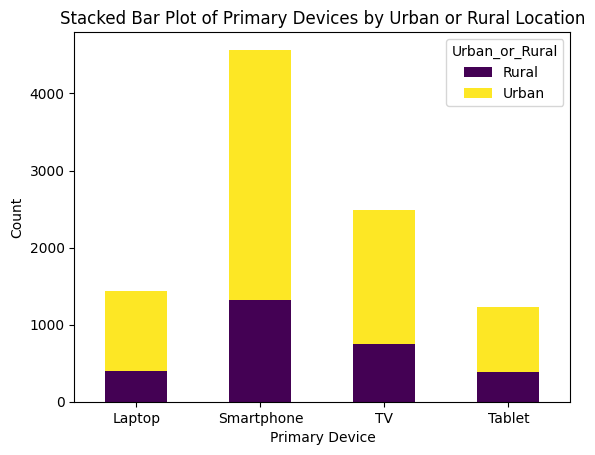

In [91]:
device_location_counts = df.groupby('Primary_Device')['Urban_or_Rural'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
device_location_counts.plot(kind='bar', stacked=True, rot=0, colormap='viridis')
plt.title('Stacked Bar Plot of Primary Devices by Urban or Rural Location')
plt.xlabel('Primary Device')
plt.ylabel('Count')
plt.show()

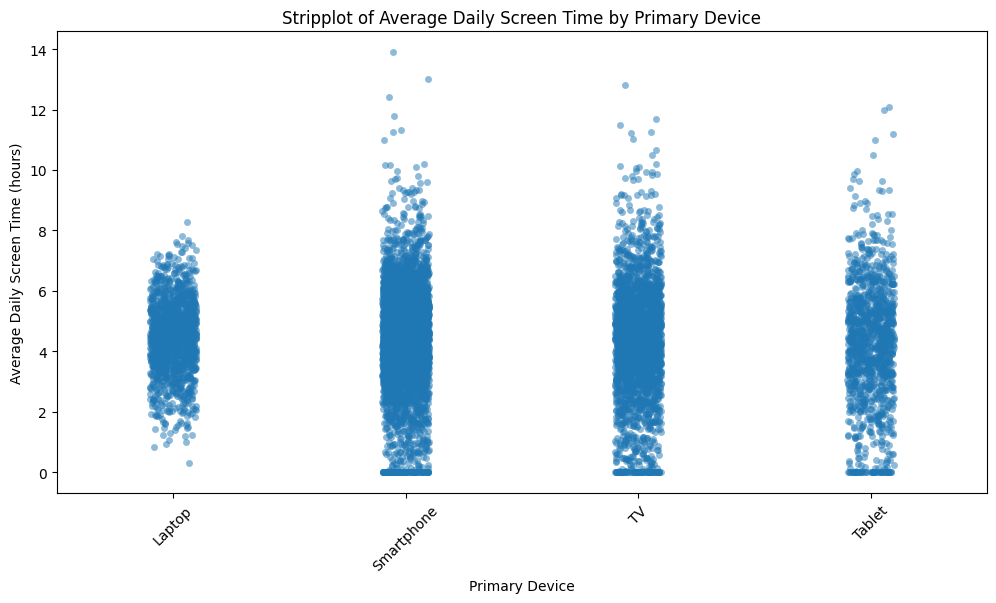

In [92]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', alpha=0.5)
plt.title('Stripplot of Average Daily Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.xticks(rotation=45)
plt.show()

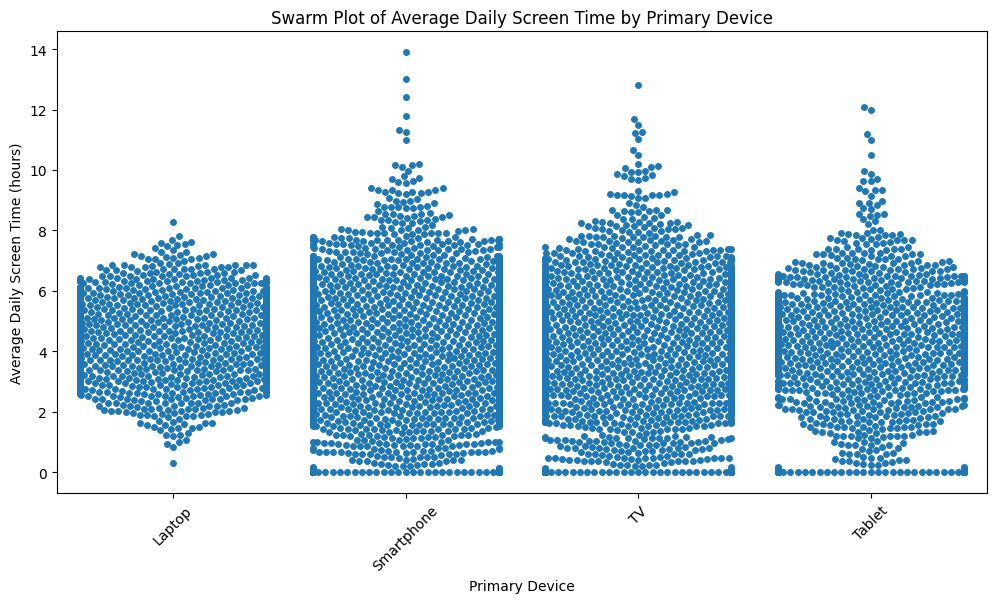

In [93]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr')
plt.title('Swarm Plot of Average Daily Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.xticks(rotation=45)
plt.show()

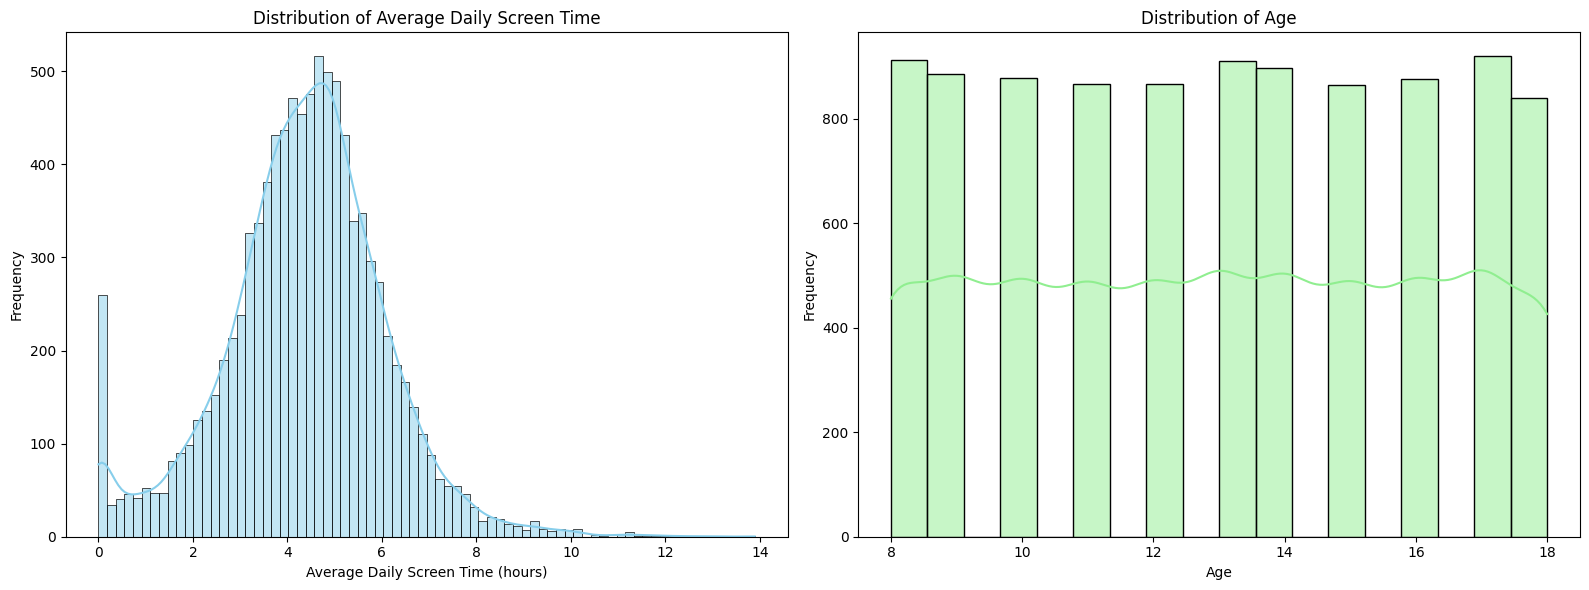

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Average Daily Screen Time')
axes[0].set_xlabel('Average Daily Screen Time (hours)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='Age', kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

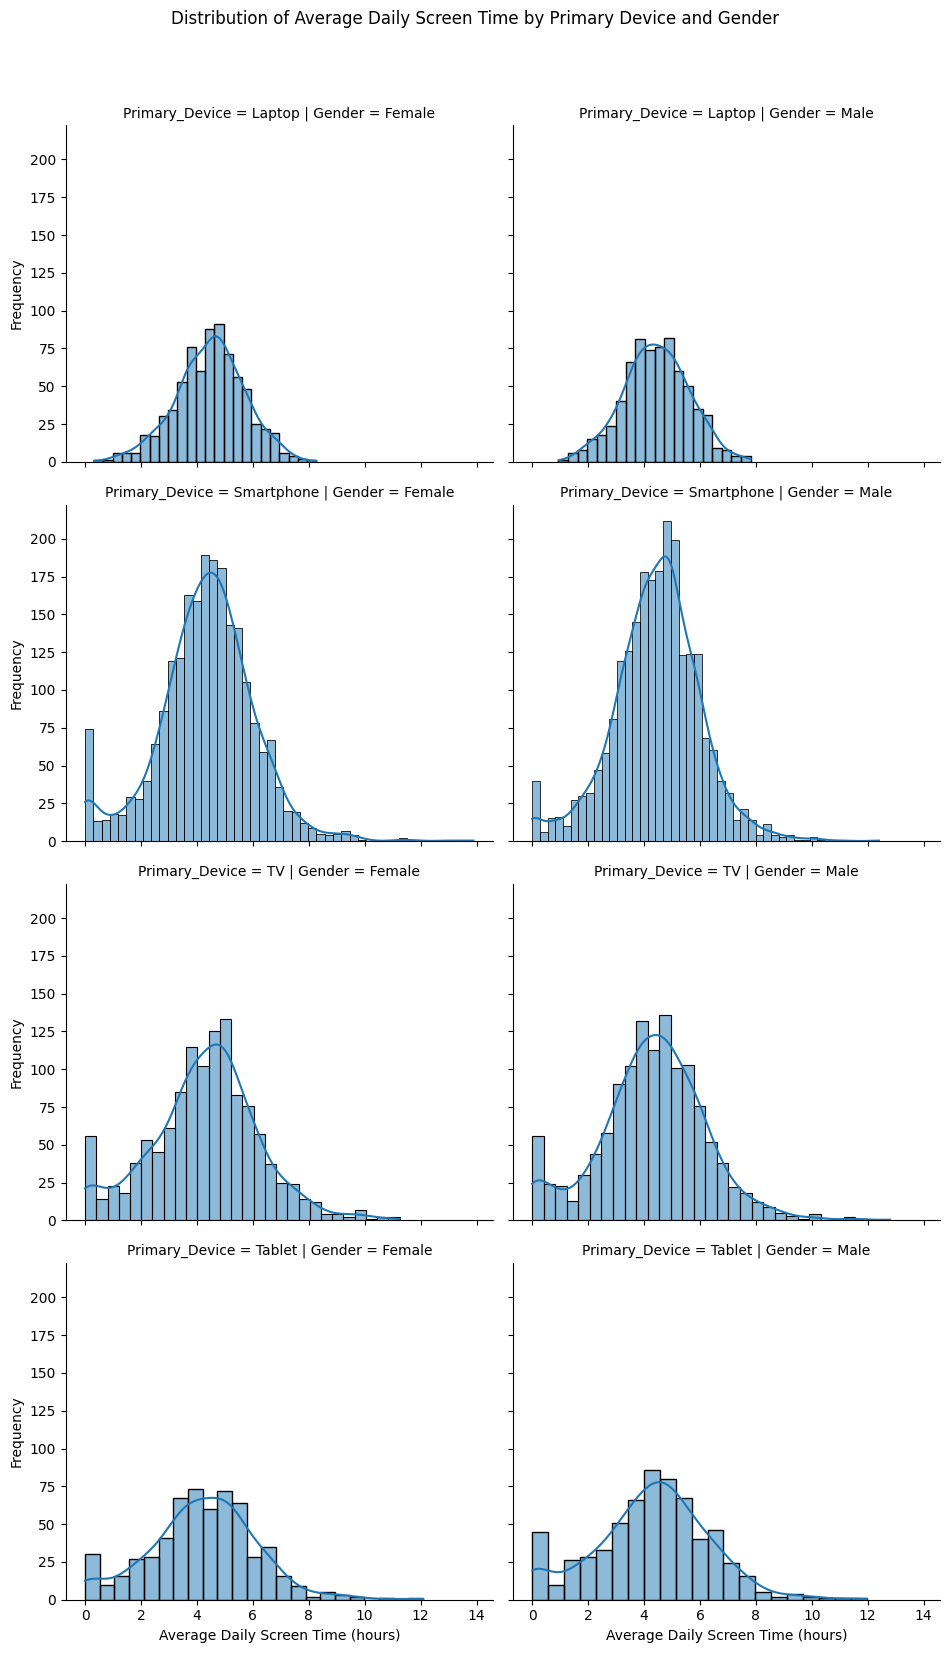

In [95]:
g = sns.FacetGrid(df, col='Gender', row='Primary_Device', height=4, aspect=1.2)
g.map(sns.histplot, 'Avg_Daily_Screen_Time_hr', kde=True)
g.fig.suptitle('Distribution of Average Daily Screen Time by Primary Device and Gender', y=1.03)
g.set_axis_labels('Average Daily Screen Time (hours)', 'Frequency')
plt.tight_layout()
plt.show()

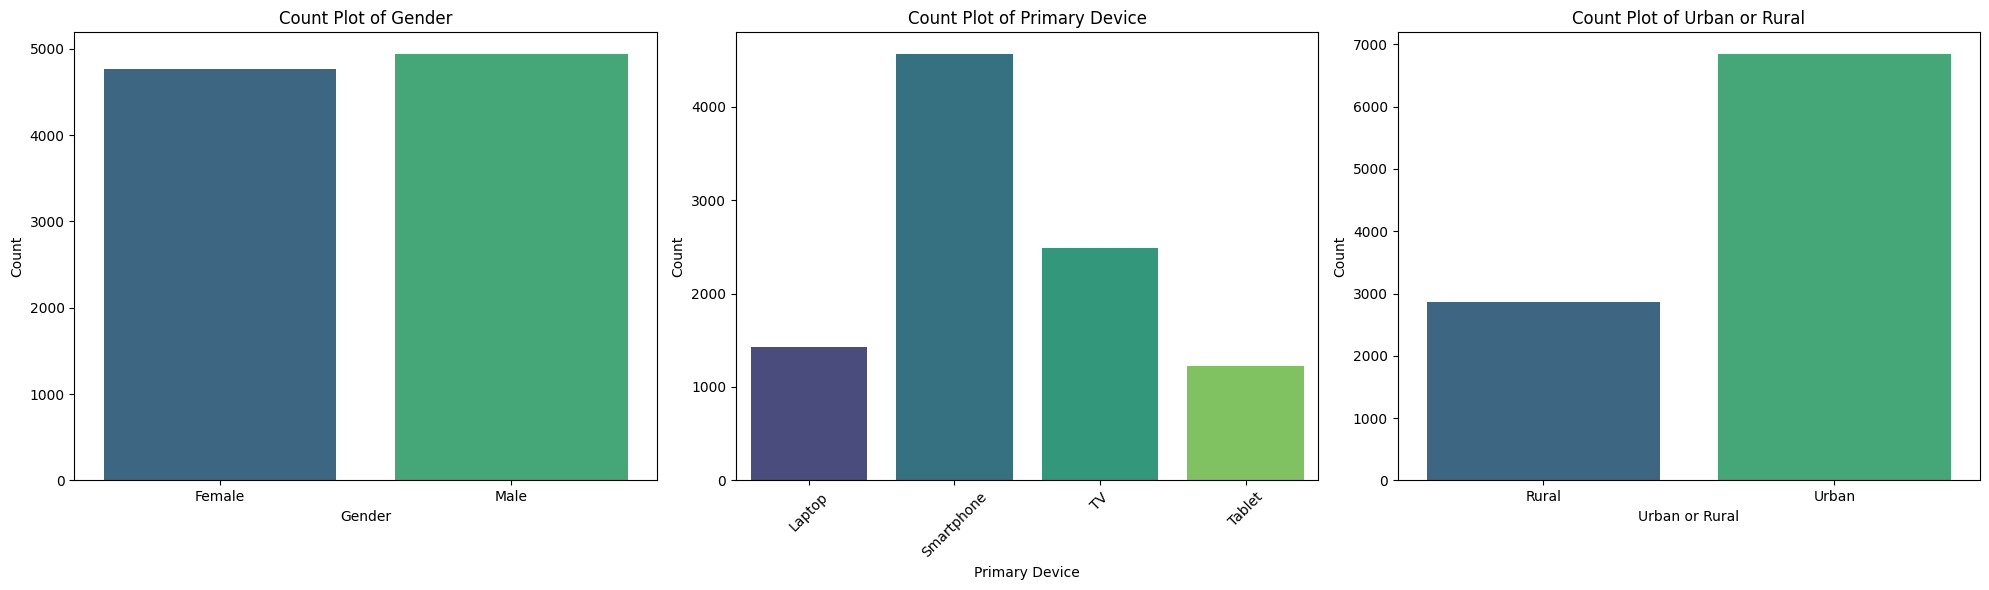

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df, x='Gender', hue='Gender', palette='viridis', legend=False, ax=axes[0])
axes[0].set_title('Count Plot of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Primary_Device', hue='Primary_Device', palette='viridis', legend=False, ax=axes[1])
axes[1].set_title('Count Plot of Primary Device')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Urban_or_Rural', hue='Urban_or_Rural', palette='viridis', legend=False, ax=axes[2])
axes[2].set_title('Count Plot of Urban or Rural')
axes[2].set_xlabel('Urban or Rural')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

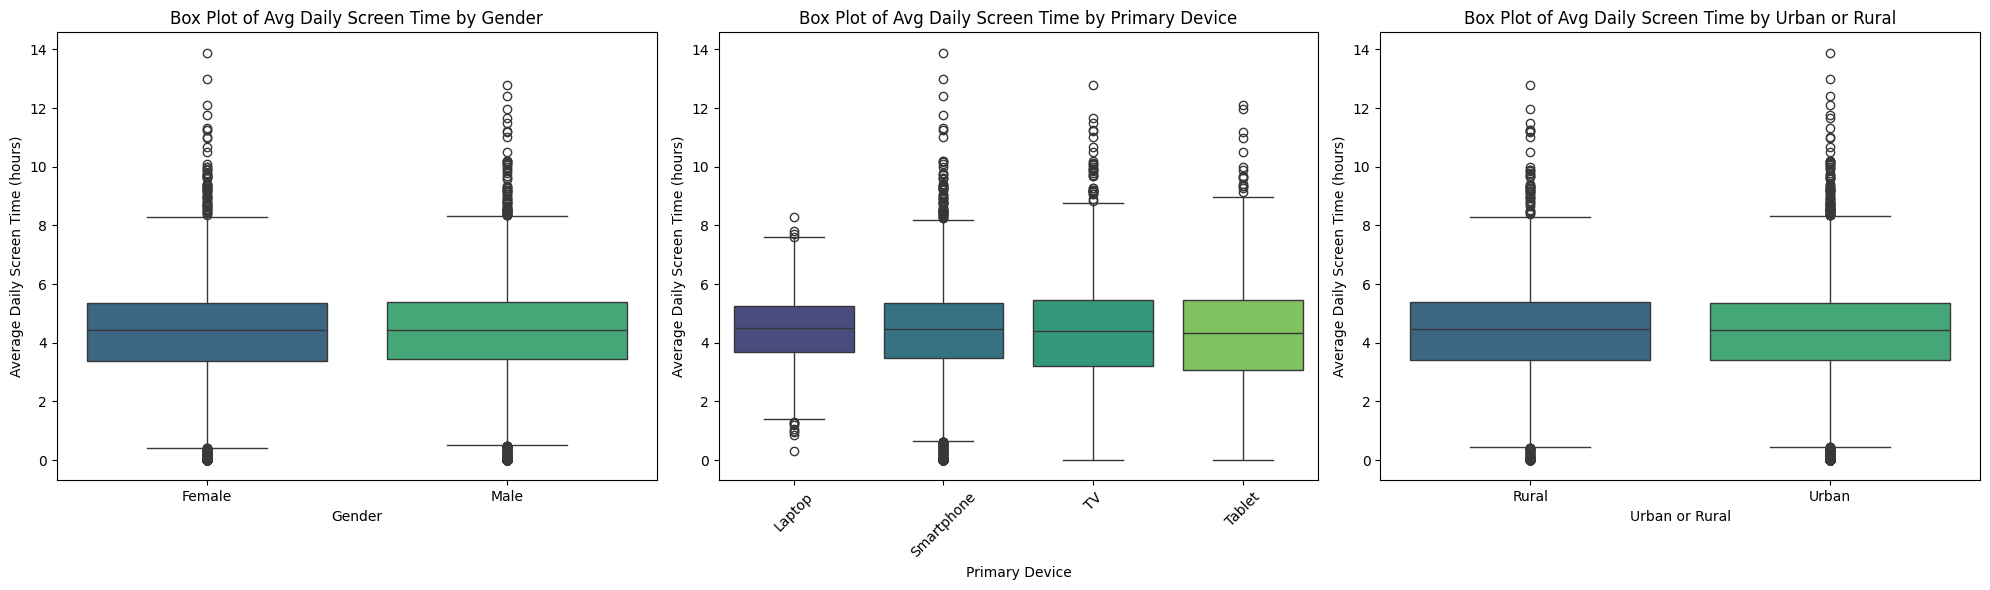

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='viridis', legend=False, ax=axes[0])
axes[0].set_title('Box Plot of Avg Daily Screen Time by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Daily Screen Time (hours)')

sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='viridis', legend=False, ax=axes[1])
axes[1].set_title('Box Plot of Avg Daily Screen Time by Primary Device')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Average Daily Screen Time (hours)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette='viridis', legend=False, ax=axes[2])
axes[2].set_title('Box Plot of Avg Daily Screen Time by Urban or Rural')
axes[2].set_xlabel('Urban or Rural')
axes[2].set_ylabel('Average Daily Screen Time (hours)')

plt.tight_layout()
plt.show()